In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import sklearn.cluster as skc
from scipy.spatial.distance import cdist
import sys

In [5]:
RANGE = 10

In [6]:
df = pd.read_csv('mission_1.csv')

data = []
for _, d in df.iterrows():
    data.append(d.tolist()[1:])
data = np.array(data)
np.random.shuffle(data)
test = data[-1:]
data = data[:-1]

In [7]:
data_norm = (data - data.mean()) / (data.max() - data.min())

Text(0.5,0,u'Action')

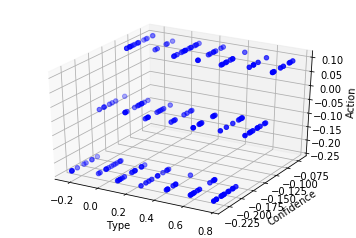

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [11]:
cluster_inertia = []
for k in xrange(1, RANGE):
    k_means_model = skc.KMeans(n_clusters=k).fit(data)
    cluster_inertia.append(k_means_model.inertia_)
    
print('K Values: ', cluster_inertia)

K Values:  [27.420390532018942, 10.039298428357315, 6.8006727837527237, 5.3059336569384552, 4.0907811201231814, 3.2133584685533156, 2.5582422078362446, 2.1589612709994968, 1.7933215846563084]


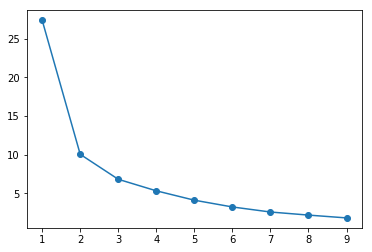

In [12]:
plt.plot(xrange(1, RANGE), cluster_inertia, marker='o')

In [13]:
#k_means_model = skc.KMeans(n_clusters=3).fit(data)
#k_means_model = skc.MiniBatchKMeans(n_clusters=3).fit(data)
#k_means_model = skc.AffinityPropagation(preference=-50).fit(data)
#bandwidth = skc.estimate_bandwidth(data, quantile=0.2, n_samples=50)
#k_means_model = skc.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#k_means_model = skc.DBSCAN(eps=0.1, min_samples=10).fit(data)

centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

print(centroids)
print(labels)

[[ 0.33331572 -0.20972011 -0.23531173]
 [-0.23531173 -0.18899291 -0.16239507]
 [ 0.69246604 -0.12669351  0.00357716]
 [ 0.1605216  -0.0949573   0.0980216 ]
 [ 0.38468827 -0.13955593 -0.01531173]
 [ 0.0038187  -0.15413935 -0.06864507]
 [ 0.68497812 -0.21036586 -0.23531173]
 [-0.19562919 -0.09966399  0.0980216 ]
 [ 0.02064065 -0.20642518 -0.23531173]]
[0 1 2 8 5 3 1 3 8 1 4 7 7 8 8 1 4 3 7 6 1 2 3 0 5 5 3 6 6 4 6 4 0 4 4 8 5
 2 1 3 0 1 3 4 7 4 8 7 2 0 6 6 2 2 2 0 4 6 2 3 3 5 4 8 4 8 1 8 5 3 2 2 0 0
 4 5 5 3 2 5 2 6 7 6 5 5 3 7 3 4 4 2 7 3 6 6 8 0 7 5 8 6 2 4 4 1 8 6 4 8 5
 4 6 8 7 4 4 6 2 0 7 8 8 4 7 8 5 1 2 8 8 2 1 6 3 2 7 0 3 5 7 3 6 3 8 7 8 7
 2 8 2 5 1 2 4 3 4 0 5 8 2 5 6 3 6 4 7 0 3 7 7 1 1 7 4 2 1 1 5 0 2 3 6 5 2
 2 6 0 3 2 6 6 0 5 5 2 3 2 0 8 8 2 7 8 8 8 5]


Text(0.5,0,u'Action')

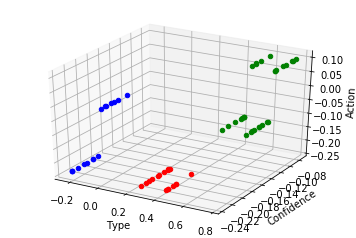

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in xrange(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='r', marker='o')
    elif labels[i] == 1:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='b', marker='o')
    elif labels[i] == 2:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='g', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [15]:
centroid_shape = centroids.shape[0]

prototypes = np.zeros((centroid_shape, 2))

for i in xrange(centroid_shape):
    for j in xrange(labels.shape[0]):
        if labels[j] == i:
            dist = np.linalg.norm(centroids[i] - data[j])
            
            if not prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                continue
                
            if dist < prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                
prototypes

array([[  1.19000000e+02,   6.87852941e-02],
       [  1.32000000e+02,   7.30037765e-02],
       [  1.89000000e+02,   1.02199378e-01],
       [  8.60000000e+01,   6.25629450e-02],
       [  5.60000000e+01,   7.08676394e-02],
       [  1.78000000e+02,   7.24643433e-02],
       [  8.30000000e+01,   7.97867844e-02],
       [  1.20000000e+02,   3.96826140e-02],
       [  1.30000000e+02,   7.73813373e-02]])

In [16]:
for i in xrange(prototypes.shape[0]):
    print(data[int(prototypes[:, 0][i])])

[ 0.26468827 -0.21437732 -0.23531173]
[-0.23531173 -0.18542765 -0.23531173]
[ 0.76468827 -0.13024513 -0.06864507]
[ 0.0980216  -0.09776302  0.0980216 ]
[ 0.43135493 -0.13954622 -0.06864507]
[-0.06864507 -0.15442808 -0.06864507]
[ 0.76468827 -0.21386211 -0.23531173]
[-0.23531173 -0.09974082  0.0980216 ]
[ 0.0980216  -0.20618111 -0.23531173]


### The robot [action] when presented with a [type] query with a confidence [confidence]%.
### Which action would you prefer for the robot to make next time:
### 1 - Same action
### 2, 3 - Next two

In [17]:
def display_question(survey):
    print(survey[-1])
    sys.stdout.write('The robot ')
    if int(survey[-1]) == 0:
        sys.stdout.write('was fully autonomous')
    elif int(survey[-1]) == 1:
        sys.stdout.write('stopped and waited for your input')
    elif int(survey[-1]) == 2:
        sys.stdout.write('continued its task and asked for your answer later')

    sys.stdout.write(' when presented with a ')

    if int(survey[0]) == 0:
        sys.stdout.write('visual')
    elif int(survey[0]) == 1:
        sys.stdout.write('tagging')
    elif int(survey[0]) == 2:
        sys.stdout.write('path')
    elif int(survey[0]) == 3:
        sys.stdout.write('communication')
    elif int(survey[0]) == 4:
        sys.stdout.write('robot health')
    elif int(survey[0]) == 5:
        sys.stdout.write('audio')
    elif int(survey[0]) == 6:
        sys.stdout.write('task')

    sys.stdout.write(' query with a confidence of ')

    sys.stdout.write('{}%\n'.format(int(survey[1]*100)))

In [18]:
def survey_func(survey):
    display_question(survey)
    
    sys.stdout.write('Which action would you prefer for the robot to make next time:\n')
    sys.stdout.write('1 - Same action\n')
    if int(survey[-1]) == 0:
        sys.stdout.write('2 - Stop and ask\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 0
        elif result == 2:
            return 1
        elif result == 3:
            return 2
    elif int(survey[-1]) == 1:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 1
        elif result == 2:
            return 0
        elif result == 3:
            return 2
    elif int(survey[-1]) == 2:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Stop and ask\n')
        
        result = input()
        if result == 1:
            return 2
        elif result == 2:
            return 0
        elif result == 3:
            return 1

In [19]:
cluster_labels = dict()
for p in prototypes[:, 0]:
    preferred_action = survey_func(data[int(p)])
    cluster_labels[labels[int(p)]] = preferred_action

-0.235311732919
The robot was fully autonomous when presented with a visual query with a confidence of -21%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Stop and ask
3 - Continue but still ask
2
-0.235311732919
The robot was fully autonomous when presented with a visual query with a confidence of -18%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Stop and ask
3 - Continue but still ask


KeyboardInterrupt: 

In [12]:
cluster_labels

{0: 2, 1: 0, 2: 1}

In [13]:
for t in test:
    c_predict = k_means_model.predict([t])[0]
    action = cluster_labels[c_predict]
    if t[-1] != action:
        print('Before:')
        display_question(t)
        t[-1] = action
        print('After:')
        display_question(t)
        print()

Before:
0.0
The robot was fully autonomous when presented with a path query with a confidence of 27%
After:
1.0
The robot stopped and waited for your input when presented with a path query with a confidence of 27%



colors = ["g.", "r.", "c.", "y."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1, zorder=10)